In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('data/produkt_zehn_min_ff_20200101_20201231_05705.txt', delimiter = ";")

# Remove unneccesary columns
df.drop(['STATIONS_ID', '  QN', 'DD_10', 'eor'], axis = 1, inplace = True)

# Calculate 10 Min Output
df['Watt_10min'] =  round((math.pi / 2 * 5.1**2 * df['FF_10']**3 * 1.2 * 0.5).astype(int))

df['Watt_1h_ahead'] = df['Watt_10min'].rolling(6).sum().shift(-6).fillna(0).astype(int)

df['Watt_4h_ahead'] = df['Watt_10min'].rolling(24).sum().shift(-24).fillna(0).astype(int)

df['Watt_12h_ahead'] = df['Watt_10min'].rolling(72).sum().shift(-72).fillna(0).astype(int)

df['Watt_24h_ahead'] = df['Watt_10min'].rolling(144).sum().shift(-144).fillna(0).astype(int)

df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M')

df.head(25)

,MESS_DATUM,FF_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead
0,2020-01-01 00:00:00,0.8,12,204,1938,5088,6237
1,2020-01-01 00:10:00,0.6,5,199,2471,5107,6232
2,2020-01-01 00:20:00,0.9,17,182,2622,5190,6215
3,2020-01-01 00:30:00,0.8,12,175,2642,5245,6204
4,2020-01-01 00:40:00,1.6,100,80,2543,5187,6105
5,2020-01-01 00:50:00,1.3,53,51,2490,5234,6064
6,2020-01-01 01:00:00,0.9,17,134,2476,5259,6100
7,2020-01-01 01:10:00,0.2,0,146,2479,5301,6112
8,2020-01-01 01:20:00,0.3,0,151,2496,5354,6124
9,2020-01-01 01:30:00,0.6,5,154,2533,5391,6136


In [3]:
# Filter
start_date = '2020-06-01 00:00:00'
end_date = '2020-06-02 00:00:00'

mask = (df['MESS_DATUM'] >= start_date) & (df['MESS_DATUM'] < end_date)

selected_dates = df.loc[mask]

selected_dates.head()

,MESS_DATUM,FF_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead
21888,2020-06-01 00:00:00,0.9,17,2343,4244,55035,186956
21889,2020-06-01 00:10:00,1.1,32,2538,4354,59308,187521
21890,2020-06-01 00:20:00,2.0,196,2680,4385,61498,188055
21891,2020-06-01 00:30:00,2.5,383,2417,4044,62258,188333
21892,2020-06-01 00:40:00,2.8,538,1891,3559,63409,188598


Text(0, 0.5, 'Watt')

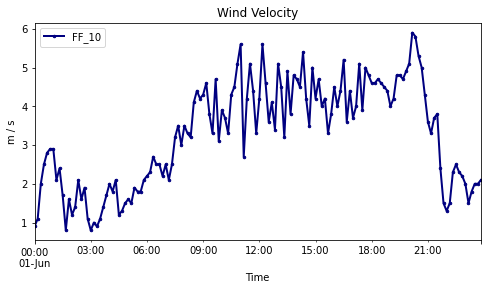

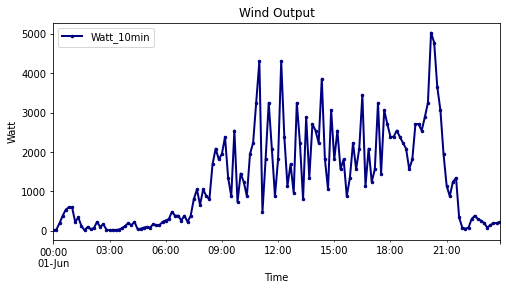

In [4]:
# Plot
ax = selected_dates.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Wind Velocity', figsize=(8, 4), x='MESS_DATUM', y='FF_10')
ax.set_xlabel("Time")
ax.set_ylabel("m / s")

ax = selected_dates.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Wind Output', figsize=(8, 4), x='MESS_DATUM', y='Watt_10min')
ax.set_xlabel("Time")
ax.set_ylabel("Watt")

                    Velocity
2020-06-01 00:00:00      0.9
2020-06-01 00:10:00      1.1
2020-06-01 00:20:00      2.0
2020-06-01 00:30:00      2.5
2020-06-01 00:40:00      2.8


Text(0, 0.5, 'Watt')

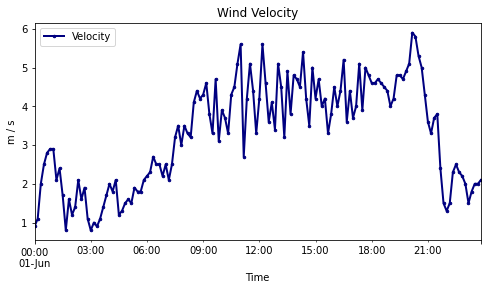

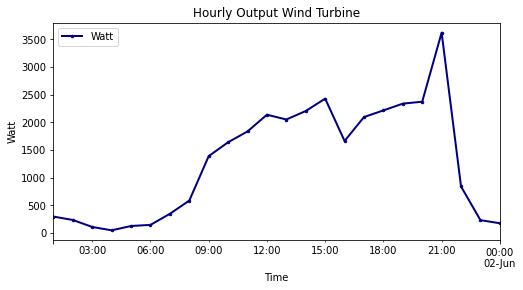

In [6]:
f=open('data/produkt_zehn_min_ff_20200101_20201231_05705.txt',"r")
rows=f.readlines()
result={}

for row in rows:
    key = row.split(';')[1]
    value = row.split(';')[3]

    if key.startswith('20200601'):
        datetime_key = datetime.strptime(key, '%Y%m%d%H%M')
        result[datetime_key] = value
f.close()
df = pd.DataFrame.from_dict(result, orient='index', columns=['Velocity'])
print(df.head())
df['Velocity'] =  pd.to_numeric(df['Velocity'])

ax = df.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Wind Velocity', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("m / s")

watt = df
watt['Watt'] =  math.pi / 2 * 5.1**2 * watt['Velocity']**3 * 1.2 * 0.5

# Set Bottom
#watt['Wind Speed'].values[watt['Wind Speed'] < 3] = 0
# Set Ceiling
#watt['Watt'].values[watt['Watt'] > 9999] = 10000

del watt['Velocity']
hour = watt.resample('H', label='right').mean()
ax = hour.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Hourly Output Wind Turbine', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("Watt")
